# **Import Libraries:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

Dataset columns:

- Title: title of news article
- Text: body text of news article

# **Import Fake or Real News Data:**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/fake_or_real_news.csv", engine='python')

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# **Data Preprocessing:**


### What this does:
- Prepares raw news article text for NLP tasks like fake news detection.
- Ensures removing noise (punctuation, digits, extra spaces).
- Adds a new column clean_text to the DataFrame for further analysis or modeling.


In [ ]:
# import regular expressions module, which allows to work with patterns in strings.

import re

def clean_text(text):
    text = str(text).lower()                  # convert in lowercase
    text = re.sub(r'[^a-zA-Z ]', ' ', text)   # remove punctuation/digits
    text = re.sub(r'\s+', ' ', text)          # remove extra spaces
    return text.strip()

df["clean_text"] = df["text"].apply(clean_text)
df.head()

,Unnamed: 0,title,text,label,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u s secretary of state john f kerry said monda...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and front runners...


### What Tokenization does
- Preparing text data for NLP by breaking it into word-level tokens.
- This is a foundational step before applying models


In [ ]:
# Import the Natural Language Toolkit library, commonly used for text processing tasks
import nltk

# Download the 'punkt' tokenizer model, which is used for splitting text into words or sentences
nltk.download('punkt')
nltk.download('punkt_tab')  # Download the 'punkt_tab' resource

# Apply word tokenization to each entry in the 'clean_text' column
# This creates a new column called 'tokens' that contains lists of individual words
df["tokens"] = df["clean_text"].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Unnamed: 0,title,text,label,clean_text,tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron..."


### What stopwords does
- filtering out common filler words to focus on the core meaning of each sentence.


In [ ]:
# Import the list of stopwords from NLTK (common words like "the", "is", "and" that add little meaning)
from nltk.corpus import stopwords

# Download the stopwords dataset (needed for first-time use)
nltk.download("stopwords")

# Create a set of English stopwords for fast lookup
stop_words = set(stopwords.words("english"))

# Remove stopwords from each token list in the 'tokens' column
# This creates a new column 'tokens_no_stop' with only meaningful words
df["tokens_no_stop"] = df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])

# Display the first few rows of the updated DataFrame to verify the result
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,title,text,label,clean_text,tokens,tokens_no_stop
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s...","[u, secretary, state, john, f, kerry, said, mo..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less...","[kaydee, king, kaydeeking, november, lesson, t..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron...","[primary, day, new, york, front, runners, hill..."


### What lemmatization does:
- It converts words like "running" → "run", "better" → "good" (if POS is provided).
- Unlike stemming, lemmatization uses vocabulary and grammar rules for cleaner results.


In [ ]:
# Import the WordNet lemmatizer from NLTK, which reduces words to their base or dictionary form
from nltk.stem import WordNetLemmatizer

# Download the WordNet database (required for lemmatization)
nltk.download('wordnet')

# Create an instance of the WordNetLemmatizer
lemma = WordNetLemmatizer()

# Apply lemmatization to each word in the 'tokens_no_stop' column
# This creates a new column 'lemma_tokens'
df["lemma_tokens"] = df["tokens_no_stop"].apply(lambda x: [lemma.lemmatize(word) for word in x])
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,title,text,label,clean_text,tokens,tokens_no_stop,lemma_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s...","[u, secretary, state, john, f, kerry, said, mo...","[u, secretary, state, john, f, kerry, said, mo..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less...","[kaydee, king, kaydeeking, november, lesson, t...","[kaydee, king, kaydeeking, november, lesson, t..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron...","[primary, day, new, york, front, runners, hill...","[primary, day, new, york, front, runner, hilla..."


### Why this step matters:
- After tokenization, stopword removal, and lemmatization, your text is in list format (['word1', 'word2', ...]).
- Joining the tokens makes it usable for models


In [ ]:
# Create a new column 'final_text' by joining the lemmatized tokens into a single string
# This transforms the list of words in 'lemma_tokens' back into a readable sentence-like format
df["final_text"] = df["lemma_tokens"].apply(lambda x: " ".join(x))
df.head()

,Unnamed: 0,title,text,label,clean_text,tokens,tokens_no_stop,lemma_tokens,final_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s...","[u, secretary, state, john, f, kerry, said, mo...","[u, secretary, state, john, f, kerry, said, mo...",u secretary state john f kerry said monday sto...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less...","[kaydee, king, kaydeeking, november, lesson, t...","[kaydee, king, kaydeeking, november, lesson, t...",kaydee king kaydeeking november lesson tonight...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron...","[primary, day, new, york, front, runners, hill...","[primary, day, new, york, front, runner, hilla...",primary day new york front runner hillary clin...


# **Train–Test Split:**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Select the final preprocessed text column as input features (X)
X = df["final_text"]

# Convert the 'label' column from text to numeric: FAKE → 0, REAL → 1
y = df["label"].map({'FAKE': 0, 'REAL': 1})

# Split the data into training and testing sets:
#  80% for training, 20% for testing
#  random_state ensures reproducibility
#  stratify=y keeps the FAKE/REAL label distribution balanced in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# shape of data
print(f"Shape of Train_text:", X_train.shape)
print(f"Shape of Test_text:", X_test.shape)
print(f"Shape of Train_lable:", y_train.shape)
print(f"Shape of Test_label:", y_test.shape)

Shape of Train_text: (5068,)
Shape of Test_text: (1267,)
Shape of Train_lable: (5068,)
Shape of Test_label: (1267,)


#  **TF-IDF:**
TF-IDF vectorization is typically done after splitting the data into training and testing sets. This ensures that the vectorizer learns only from the training data and avoids data leakage from the test set.
### Why this order matters:
- fit_transform on training: learns word importance from training data only.
- transform on test: applies the same learned weights to unseen data.
- This avoids data leakage, which could lead to overfitting and unrealistic model performance.


In [ ]:
# Initialize the TF-IDF vectorizer
#  max_features=10000: keep only the top 10,000 most important words
#  ngram_range=(1,2): include both single words (unigrams) and two-word combinations (bigrams)
#  min_df=5: ignore words that appear in fewer than 5 documents
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=5)

# Fit the vectorizer on the training data and transform it into a TF-IDF matrix
# This learns the vocabulary and computes TF-IDF scores for X_train
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data using the same vocabulary learned from training
# This ensures consistency and prevents test data from influencing the model
X_test_tfidf = tfidf.transform(X_test)

#  **Simple Deep Learning Model:**
### What this model does:
- It's designed for binary classification (FAKE vs REAL news).
- Uses TF-IDF features as input.
- Combines dense layers, dropout, and L2 regularization to balance learning and generalization.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Create a sequential neural network model
model = Sequential()

# Add the first dense (fully connected) layer:
#  128 neurons
#  ReLU activation for non-linearity
#  L2 regularization (0.01) to prevent overfitting
#  input_dim is set to the number of TF-IDF features
model.add(Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1],
                kernel_regularizer=regularizers.l2(0.01)))

# Add dropout layer to randomly deactivate 40% of neurons during training (helps prevent overfitting)
model.add(Dropout(0.4))

# Add second dense layer:
# - 64 neurons
# - ReLU activation
# - L2 regularization again
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))

# Add another dropout layer with 30% dropout rate
model.add(Dropout(0.3))

# Add final output layer:
#  1 neuron (for binary classification)
#  Sigmoid activation to output probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))

# Display the model architecture summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,449 (4.92 MB)

 Trainable params: 1,288,449 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Compilation:**
- **optimizer='adam'**: Efficient optimizer that adapts learning rate during training.
- **loss='binary_crossentropy'**: Used for binary classification (FAKE vs REAL).
- **metrics=['accuracy']**: Tracks accuracy during training and evaluation.


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# **Early Stopping Setup:**
- Prevents overfitting and saves training time by stopping early when performance plateaus.


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',         # Watch validation loss to detect overfitting
    patience=2,                 # Stop training if val_loss doesn't improve for 2 epochs
    restore_best_weights=True   # Revert to the best model weights before overfitting started
)

# **Model Train:**

In [ ]:
history = model.fit(
    X_train_tfidf, y_train,        # Training data
    epochs=15,                     # Max number of training cycles
    batch_size=64,                 # Number of samples per gradient update
    validation_split=0.2,          # 20% of training data used for validation
    callbacks=[early_stopping]     # Apply early stopping during training
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6502 - loss: 2.1444 - val_accuracy: 0.8659 - val_loss: 0.9050
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8726 - loss: 0.8206 - val_accuracy: 0.8895 - val_loss: 0.6548
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8973 - loss: 0.6275 - val_accuracy: 0.9053 - val_loss: 0.5794
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9095 - loss: 0.5661 - val_accuracy: 0.9004 - val_loss: 0.5452
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9026 - loss: 0.5306 - val_accuracy: 0.9172 - val_loss: 0.5319
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9268 - loss: 0.5238 - val_accuracy: 0.9142 - val_loss: 0.5229
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9297 - loss: 0.4987 - val_accuracy: 0.9063 - val_loss: 0.5153
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9314 - loss: 0.4948 - val_accuracy: 0.9093 - v

#

# **Evaluate the model on test data:**
- model.evaluate(...) runs the model on unseen test data.
- X_test_tfidf: TF-IDF features of the test set.
- y_test: True labels (0 for FAKE, 1 for REAL).
- batch_size=64: Processes 64 samples at a time.
- verbose=2: Shows progress bar and final metrics.
- Returns:
- test_loss: How well the model fits the test data.
- test_acc: Overall accuracy on the test set.


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_tfidf, y_test, verbose=2, batch_size=64)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

20/20 - 0s - 11ms/step - accuracy: 0.9219 - loss: 0.4881
Test loss: 0.4880678355693817
Test accuracy: 0.9218626618385315


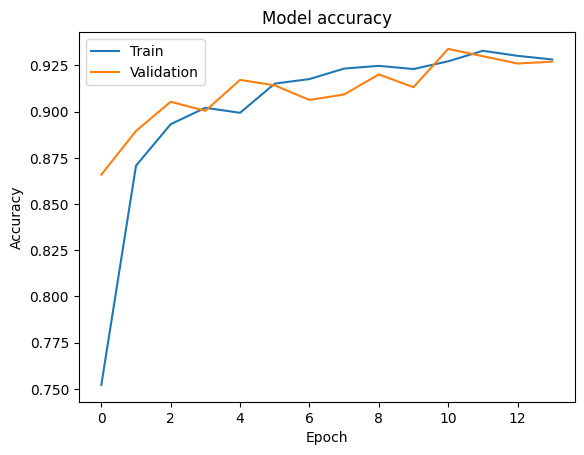

In [ ]:
import matplotlib.pyplot as plt
# plot train accuracy & validation accuracy & test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

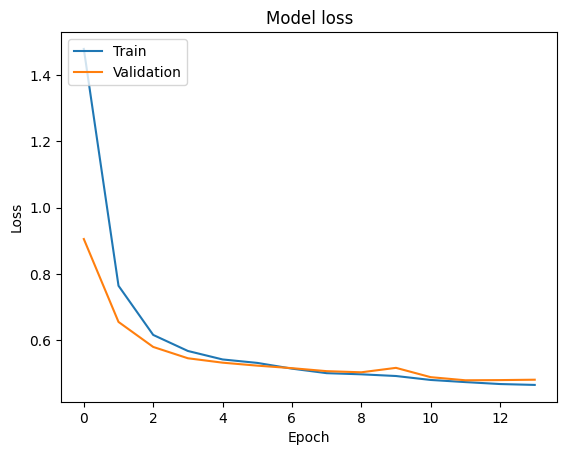

In [ ]:
# Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Predict labels:**
- `model.predict(...)` gives probabilities between 0 and 1.
- `> 0.5`: Converts probabilities to binary predictions (threshold).
- `.astype(int)`: Converts boolean values to integers (0 or 1).


In [ ]:
y_pred = (model.predict(X_test_tfidf) > 0.5).astype(int)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


# **Classification report:**
- Shows precision, recall, f1-score, and support for each class:
- Class 0: FAKE
- Class 1: REAL


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       633
           1       0.93      0.92      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



# **Confusion matrix:**
- Displays a 2×2 matrix:
- True Positives, True Negatives
- False Positives, False Negatives
- Useful for spotting misclassifications.



[[587  46]
 [ 53 581]]


<Axes: >

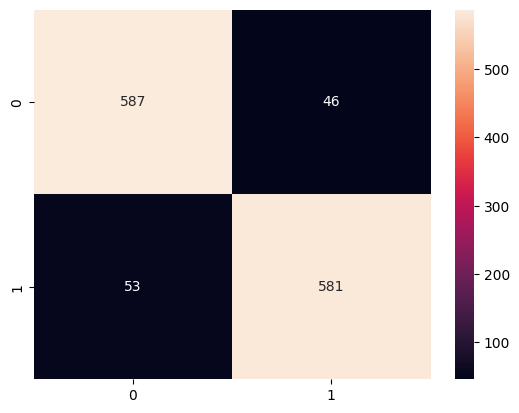

In [ ]:
# visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')


# **Prediction Function:**

In [ ]:
# Define a function to predict whether a news article is REAL or FAKE
def predict_news(text):

    # Step 1: Clean the input text using your custom cleaning function
    text = clean_text(text)

    # Step 2: Tokenize the cleaned text, remove stopwords, and lemmatize each word
    text = " ".join([
        lemma.lemmatize(word) for word in nltk.word_tokenize(text)
        if word not in stop_words
    ])

    # Step 3: Convert the processed text into a TF-IDF feature vector
    vector = tfidf.transform([text])

    # Step 4: Use the trained model to predict the probability that the news is REAL
    prediction_probability = model.predict(vector)[0][0]  # Extract scalar value from prediction array

    # Step 5: Interpret the prediction
    if prediction_probability >= 0.5:    # If probability ≥ 0.5 → classify as REAL
        return "REAL NEWS ✅"           #  Else → classify as FAKE
    else:
        return "FAKE NEWS ❌"

predict_news("""The health ministry reported an increase in vaccination coverage across urban and rural areas.
Officials said the campaign has improved public health outcomes nationwide.
The report was released after a review of hospital and clinic data.
""" )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


'REAL NEWS ✅'

### Important Point:
“The model predicts fake or real news based on linguistic and topical patterns learned from the dataset, not factual correctness of statements.”